<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 1

En esta notebook presentamos una serie de ejercicios para trabajar con variables aleatorias discretas, tanto númericas como cátegoricas, ejemplificando los conceptos de probabilidad explicados en clase. Lo primero es determinar si todas las librerías están correctamente instaladas.

In [2]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn 

In [3]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [4]:
dataset = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/violencia-institucional-2018-01.csv',
                          encoding='utf8')

In [5]:
dataset[:3]

,area,organismo_origen,via_acceso,año,provincia,contexto,contexto1,circunstancia,alojamiento,violencia_fisica,violencia_psiquica,violencia_genero,violencia_salud,resumen_hecho,descripcion_institucion,establecimiento,Unnamed: 16
0,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,NaN,NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 Junin,NaN
1,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,"Malas condiciones de alojamiento (higiene), Hu...",NaN,NaN,NaN,Denegación acceso atención médica,NaN,Servicio Penitenciario Provincial,UPP Nº 13 DE JUNIN,NaN
2,DNPCVI,SECRETARIA DE DDHH,Telefónica,"2017,00",Buenos Aires,Situaciones de Detención,Penal / Complejo Penitenciario PROVINCIAL,NaN,Malas condiciones de alojamiento (higiene),NaN,NaN,NaN,NaN,NaN,Servicio Penitenciario Provincial,UPP Nº 36 de Magdalena,NaN


Los valores para los años no tienen un formato consistente en todas las filas, por lo que los procesaremos antes de comenzar. Los valores de año faltantes son reemplazados por NaN, y como la representación de enteros de numpy no soporta este tipo de valores, convertiremos cada año a tipo numpy.float. Otras decisiones pueden ser tomadas en este punto, como reemplazar los valores faltantes por 0 o elminarlos del dataset, dependiendo del tipo de datos que se requiera.

También cambiaremos el nombre de la columna año, ya que el caracter ñ no permite utilizar el syntax sugar de pandas donde se obtienen los valores de la columna con la sintáxis de llamar a un método.

In [6]:
import six
def convert_to_int(row):
    try:
        return float(row)
    except ValueError:
        if isinstance(row, six.string_types):
            return int(row.split(',')[0])
        return row

dataset.loc[:,'year'] = dataset[u'año'].apply(convert_to_int)
# Se podrían también decodicar los nombres de provincias
# dataset.loc[:,'provincia'] = dataset.provincia.apply(lambda x: x.decode("utf-8"))

In [7]:
dataset.shape, dataset.year.dropna().shape

((1439, 18), (1316,))

---
# Ejercicios

### Ejercicio 1

* Crear una imagen mostrando la distribución de los eventos por año

* Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’

$$fdp(Y)$$

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?

* ¿A qué se debe la forma de la distribución? ¿Qué tendencia muestra? ¿Ha aumentado la violencia institucional en los últimos años?

* Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?

IMPORTANTE: ¿Qué hacemos con los datos faltantes?

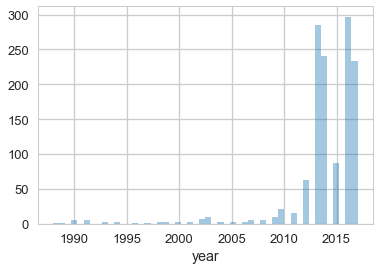

In [8]:
#Crear una imagen mostrando la distribución de los eventos por año
plot = seaborn.distplot(dataset.year.dropna(),hist=True, kde=False)

In [9]:
#Construir una tabla de frecuencia de probabilidades dado el evento Y = ’año en el que ocurrió’
fdps= dataset.year.dropna().value_counts(normalize=True).sort_index().to_frame()
fdps

,year
1988.0,0.000760
1989.0,0.000760
1990.0,0.003799
1991.0,0.003799
1993.0,0.001520
1994.0,0.002280
1996.0,0.000760
1997.0,0.000760
1998.0,0.001520
1999.0,0.001520


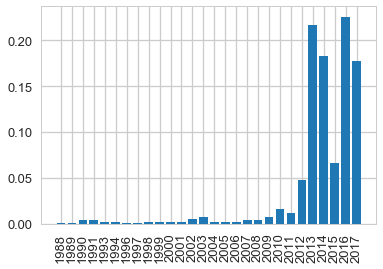

In [10]:
#Crear una imagen de dichas probabilidades con el gráfico que considere adecuado. ¿Son ambos gráficos iguales? ¿Cuál considera que es más útil?
import matplotlib.pyplot as plt
years, counts = numpy.unique(dataset.year.dropna().values.astype(int),
                             return_counts=True)
years = [str(year) for year in years]
total = sum(counts)

ax2 = plt.bar(years, [count/total for count in counts])
plt.xticks( rotation='vertical');

Es más útil el gráfico que la tabla ya que se puede detectar rápidamente, entre otras, si hay una tendencia.
En este caso vemos que sí hay una tendencia y creciente, para los casos de violencia institucional.

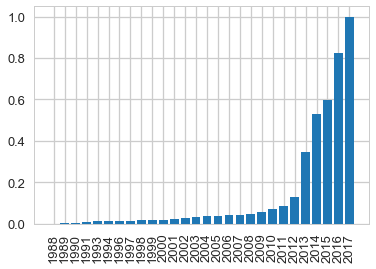

In [11]:
#Calcular la función de distribución acumulada de la variable Y y graficarla. ¿Cuál es la probabilidad de que haya dado un acto de violencia antes del último cambio de gobierno?
import matplotlib.pyplot as plt
years, counts = numpy.unique(dataset.year.dropna().values.astype(int),
                             return_counts=True)
years = [str(year) for year in years]

acum_ls = []
acum_sum = 0
total = sum(counts)

for count in counts:
    acum_sum += count
    acum_ls.append(acum_sum / total)

ax2 = plt.bar(years, acum_ls)
plt.xticks(rotation='vertical');

La probabilidad de que haya dado una acto de violencia institucional antes del cambio de gobierno (nota: no contamos diciembre de 2015) es aproximadamente **0.6**

## Ejercicio 2

* Construir una tabla de frecuencia de probabilidades dado el evento X = ’provincia donde se desarrollo el hecho’

$$fdp(X)$$

* ¿Qué información adicional es necesaria para mostrar estos datos de manera más adecuada?
* Muestre la distribución de los eventos visualmente. ¿Qué tipo de gráfico es más adecuado para mostrar esta información?

In [12]:
fdps= dataset.provincia.dropna().value_counts(normalize=True).sort_index().to_frame()
print('Provincia\t\tProbabilidad')
fdps[:-1]

Provincia		Probabilidad


,provincia
Buenos Aires,0.693182
Catamarca,0.001420
Chaco,0.020597
Chubut,0.026278
Ciudad de Buenos Aires,0.083097
Corrientes,0.003551
Córdoba,0.036932
Entre Rios,0.006392
Formosa,0.007102
Jujuy,0.006392


El gráfico más adecuado es el de barras

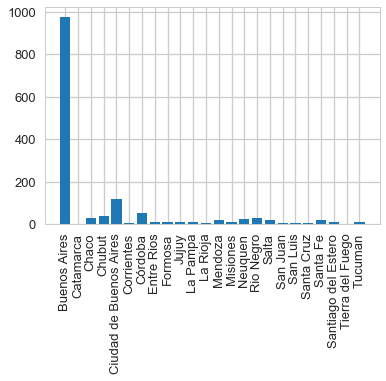

In [13]:
import matplotlib.pyplot as plt

provs, counts = numpy.unique(dataset.provincia.dropna().values.astype(str),
                             return_counts=True)


ax2 = plt.bar(provs, counts)
plt.xticks(rotation='vertical');

### Ejercicio 3

* Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores.
¿Son eventos independientes?

* Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


In [14]:
#Construir una tabla de doble entrada donde se observen las función de distribución de probabilidades con las 2 variables aleatorias anteriores
tab = pandas.crosstab(dataset["provincia"].dropna(),dataset["year"].dropna(),margins=True, normalize=True)
tab[:-1]

year,1988.0,1989.0,1990.0,1991.0,1993.0,1994.0,1996.0,1997.0,1998.0,1999.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,All
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,0.000000,0.000766,0.000000,0.002299,0.000000,0.000766,0.000000,0.000000,0.000000,0.000000,...,0.003065,0.006130,0.006897,0.016092,0.150192,0.125670,0.037548,0.178544,0.143295,0.685057
Catamarca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000766,0.000000,0.000766
Chaco,0.000000,0.000000,0.003065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005364,0.006130,0.002299,0.002299,0.002299,0.000766,0.022222
Chubut,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002299,0.000000,0.002299,0.004598,0.006897,0.001533,0.001533,0.005364,0.026054
Ciudad de Buenos Aires,0.000766,0.000000,0.000000,0.001533,0.000000,0.000000,0.000766,0.000766,0.000766,0.000000,...,0.003831,0.000766,0.001533,0.007663,0.017625,0.018391,0.007663,0.008429,0.009195,0.085824
Corrientes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001533,0.000000,0.000766,0.000766,0.000000,0.003065
Córdoba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001533,0.002299,0.003065,0.003831,0.003065,0.009962,0.008429,0.007663,0.039847
Entre Rios,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000766,0.000000,0.006130,0.000000,0.000000,0.000000,0.006897
Formosa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002299,0.002299,0.000766,0.000766,0.000766,0.007663


¿Son eventos independientes?
Si encontramos x,y tales que $$ P(X=x \cap Y=y) \neq P(X=x) * P(Y=y)$$, 
entonces no son independientes.

In [15]:
import sys
years, ycounts = numpy.unique(dataset.year.dropna().values.astype(int),
                             return_counts=True)
provs, pcounts = numpy.unique(dataset.provincia.dropna().values.astype(str),
                             return_counts=True)
#Chequear si P(year ^ provincia) = P(year) * P(provincia)

def get_probabilities(counts):
    total = sum(counts)
    return [count/total for count in counts]

years_probs = get_probabilities(ycounts)
provs_probs = get_probabilities(pcounts)

for i in range(len(provs)):
    for j in range(len(years)):
        p1 = years_probs[j] * provs_probs[i]
        prov_key = provs[i]
        year_key = int(years[j])
        p2 = tab[year_key][prov_key]
        if abs(p1 - p2) > 0.000001:
            print('F(X={} ^ Y={}) != F(X={}) * F(Y={})'.format(prov_key,year_key,prov_key,year_key))
            print('X e Y no son independientes')
            exit = True
            break
    if exit:
        break
        


F(X=Buenos Aires ^ Y=1988) != F(X=Buenos Aires) * F(Y=1988)
X e Y no son independientes


In [16]:
#Crear una imagen de dichas probabilidades con el gráfico que considere adecuado.


## Ejercicio 4

Dada la variable aleatoria Z = ’contexto1 en el que se produjo el hecho’, calcular la probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)

$$ fdp(z=penal ~~ |~~  z=comisaria ~~ | ...) $$

In [17]:
fdp = dataset['contexto1'].value_counts(normalize=True)

In [18]:
print('Probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)')
fdp['Penal / Complejo Penitenciario PROVINCIAL'] + fdp['Penal / Complejo Penitenciario FEDERAL'] + fdp['Comisaría'] + fdp['Centros de Detención Previos al Juicio (Alcaidia)'] + fdp['Instalaciones de la Gendarmería Nacional'] + fdp['Móviles y medios de transporte de Fuerzas de Seguridad'] + fdp['Escuelas de Formación Fuerzas Provinciales']  + fdp['Escuelas de Formación Fuerzas Nacionales'] + fdp['Instalaciones de las Fuerzas Armadas (cuarteles, regimientos, etc.)'] + fdp['Centros de Detención Preventiva']


Probabilidad que el hecho sea producido en una dependencia de una fuerza de seguridad (penal, comisaría, etc)


0.8108303249097474

## Ejercicio 5

Dada la variable aleatoria M = ‘existió violencia fisica’:
* ¿Que probabilidad existe que también tenga violencia psíquica? N = ‘existió violencia psíquica’

$$P(M~~|~~N)$$

* ¿Qué conclusión se puede formular de los datos que tenemos y los datos que obtenemos de los métodos probabilísticos?
* ¿Podemos concluir en que son eventos independientes dadas las muestras?

In [72]:
prob_vfisica = 0
total = len(dataset.violencia_fisica.astype(str))
prob_conj = 0

for i in range(total):
    if dataset.violencia_fisica.astype(str)[i] != 'nan':
        prob_vfisica += 1
        if dataset.violencia_psiquica.astype(str)[i] != 'nan':
            prob_conj += 1

prob_conj = prob_conj / total
prob_vfisica = prob_vfisica / total
    
print('P(N | M) = ' + str(prob_conj / prob_vfisica))

P(N | M) = 0.2135593220338983
